In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Задача 1

Для четырех выборок из квартета Энскомба вычислите выборочные дисперсии x и y координат, а также коэффициент линейной корреляции Пирсона. Изобразите выборки на графиках. Данные можно получить в системе јuруter с помощью библиотеки seaborn, вызвав метод load_dataset('anscombe') .

In [24]:
data = sns.load_dataset('anscombe')
data

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


Номер выборки I
Оценка дисперсии x: 10.0
Оценка дисперсии y: 3.7520628099173265
Коэффициент линейной корреляции Пирсона 0.8164205163448428
Номер выборки II
Оценка дисперсии x: 10.0
Оценка дисперсии y: 3.7523900826446237
Коэффициент линейной корреляции Пирсона 0.8162365060002454
Номер выборки III
Оценка дисперсии x: 10.0
Оценка дисперсии y: 3.7478363636363667
Коэффициент линейной корреляции Пирсона 0.816286739489596
Номер выборки IV
Оценка дисперсии x: 10.0
Оценка дисперсии y: 3.748408264462789
Коэффициент линейной корреляции Пирсона 0.8165214368885053


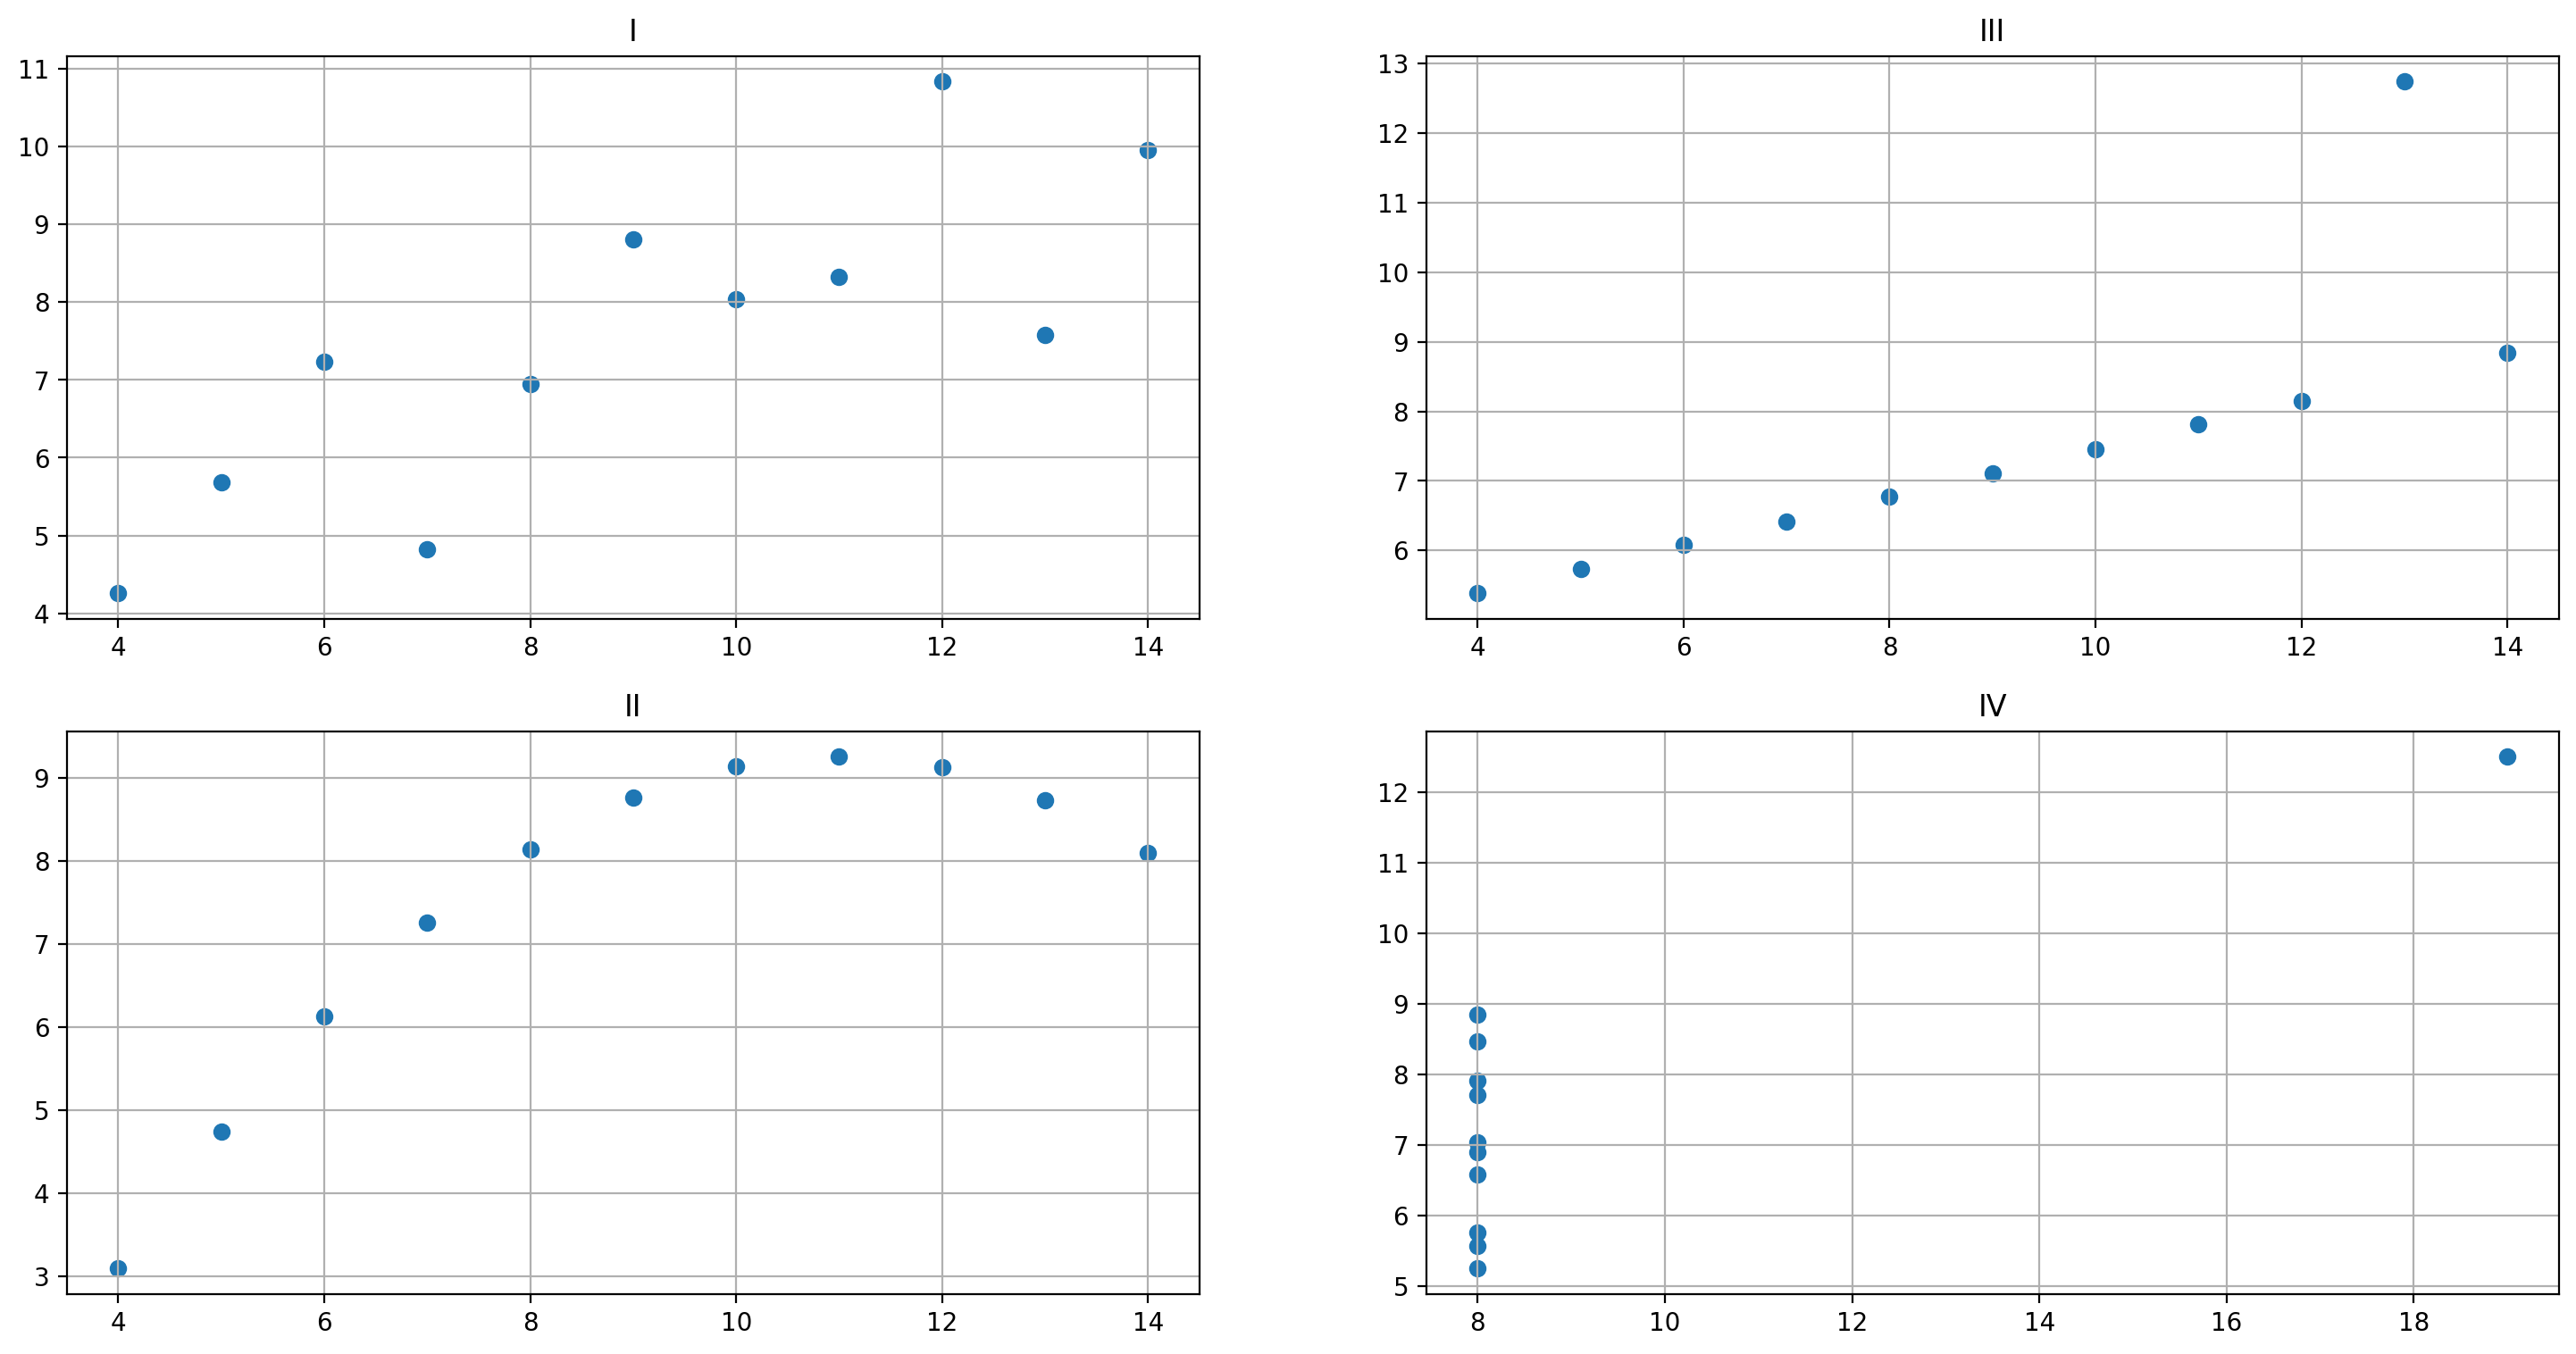

In [25]:
fig, ax = plt.subplots(2, 2, figsize = (18, 9), dpi = 200)
for dataset_name in data['dataset'].unique():
    mask = (data['dataset'] == dataset_name)
    x = data[mask]['x']
    y = data[mask]['y']
    var_x = np.sum(np.power(x, 2)) / len(x) - np.power(np.sum(x) / len(x), 2)
    var_y = np.sum(np.power(y, 2)) / len(y) - np.power(np.sum(y) / len(y), 2)
    mean_xy = np.sum(x * y) / len(x)
    mean_x_mean_y = np.sum(x) * np.sum(y) / np.power(len(x), 2) 
    cov_xy = mean_xy - mean_x_mean_y
    corr = cov_xy / np.sqrt(var_x * var_y)
    print(f"Номер выборки {dataset_name}")
    print(f"Оценка дисперсии x: {var_x}")
    print(f"Оценка дисперсии y: {var_y}")
    print(f"Коэффициент линейной корреляции Пирсона {corr}")
    if dataset_name == 'I':
        ax[0, 0].scatter(x, y)
        ax[0, 0].set_title(dataset_name)
    if dataset_name == 'II':
        ax[1, 0].scatter(x, y)
        ax[1, 0].set_title(dataset_name)
    if dataset_name == 'III':
        ax[0, 1].scatter(x, y)
        ax[0, 1].set_title(dataset_name)
    if dataset_name == 'IV':
        ax[1, 1].scatter(x, y)
        ax[1, 1].set_title(dataset_name)
    
    
    
for i in ax:
    for a in i:
        a.grid()

### Задача 2

In [26]:
l, n = 1000, 30
X = np.random.random(size = (l, n))
X_m1 = X - np.mean(X, axis = 0)
res1 = np.linalg.inv(X_m1.T @ X_m1)
X_m2 = np.hstack([X, np.ones(l)[:, np.newaxis]])
res2 = np.linalg.inv(X_m2.T @ X_m2)
res2 = res2[:-1, :-1]
print(np.allclose(res1, res2))

True
